<a href="https://colab.research.google.com/github/yasminebenbraiek/ML-Intro-Course/blob/main/4_Intro_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras #api/bib pour construire le modele neuronal
from keras.datasets import mnist # import the function mnist, used to immport data
from keras.models import Sequential #couches sequentielles, utilisé pour préparer l'emplacement des couches
from keras.layers import Dense, Dropout # Dense = Fully Connected layer.
from keras.optimizers import RMSprop, Adam #agir sur les poids
import matplotlib.pyplot as plt # shorcut for a plot function

In [ ]:
batch_size = 1024 #128 #nombre d'exemples pour une mis à jour => w= w - somme(DWi) pour notre cas 60000/128, optimise le taux d'app et gain de temps
num_classes = 10
epochs = 100

In [ ]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
[5 0 4 1 9 2 1 3 1 4]


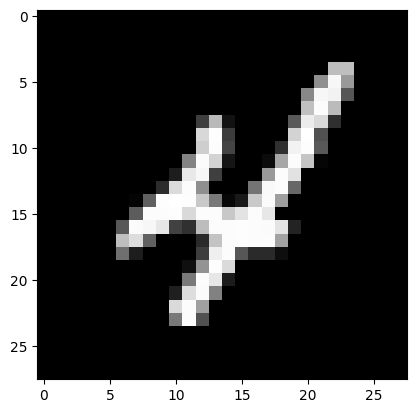

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train[:10])
plt.imshow(x_train[9,:,:], cmap='gray')

In [ ]:
x_train = x_train.reshape(60000,784) #couche d'entrée est un vecteur de 784 (caracteristiques) 28*28
x_test = x_test.reshape(10000,784)
x_train = x_train.astype('float32') #conversion;car c'etait integer, or le calcul dans rna est réel
x_test = x_test.astype('float32')
x_train  /= 255 #intervalle de [0,1], normalisation, on approche les données d'entrée pour une meilleure performance
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [ ]:
#on l'excute une fois
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
#10 neurones couches de sortie
print(y_train[1,:])
#proba = 1

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
model = Sequential()

model.add(Dense(200,activation='relu',input_shape=(784,)))
model.add(Dropout(0.5)) #desactivation de 40% des neurones, pour alléger le réseau, eviter le overfitting

model.add(Dense(200,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(200,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(200,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax')) #sortie en proba : softmax

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 200)               157000    
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 200)               40200     
                                                                 
 dropout_3 (Dropout)         (None, 200)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               40200     
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 200)              

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    x_train,
    y_train,
    batch_size = batch_size,
    epochs=epochs,
    verbose = 1, #print all
    validation_data = (x_test,y_test)
)

Epoch 1/100
59/59 [==============================] - 1s 10ms/step - loss: 1.5765 - accuracy: 0.4344 - val_loss: 0.4910 - val_accuracy: 0.8491
Epoch 2/100
59/59 [==============================] - 0s 7ms/step - loss: 0.5709 - accuracy: 0.8253 - val_loss: 0.2463 - val_accuracy: 0.9274
Epoch 3/100
59/59 [==============================] - 0s 6ms/step - loss: 0.3850 - accuracy: 0.8919 - val_loss: 0.1842 - val_accuracy: 0.9487
Epoch 4/100
59/59 [==============================] - 0s 7ms/step - loss: 0.3081 - accuracy: 0.9164 - val_loss: 0.1615 - val_accuracy: 0.9542
Epoch 5/100
59/59 [==============================] - 0s 6ms/step - loss: 0.2668 - accuracy: 0.9273 - val_loss: 0.1388 - val_accuracy: 0.9614
Epoch 6/100
59/59 [==============================] - 0s 6ms/step - loss: 0.2401 - accuracy: 0.9358 - val_loss: 0.1320 - val_accuracy: 0.9635
Epoch 7/100
59/59 [==============================] - 0s 7ms/step - loss: 0.2195 - accuracy: 0.9416 - val_loss: 0.1219 - val_accuracy: 0.9650
Epoch 8/100


In [ ]:
score = model.evaluate(x_test,y_test,verbose=1,batch_size=batch_size)
print('test loss: ',score[0])
print('test accuracy: ',score[1])

10/10 [==============================] - 0s 5ms/step - loss: 0.0883 - accuracy: 0.9809
test loss:  0.08829672634601593
test accuracy:  0.98089998960495


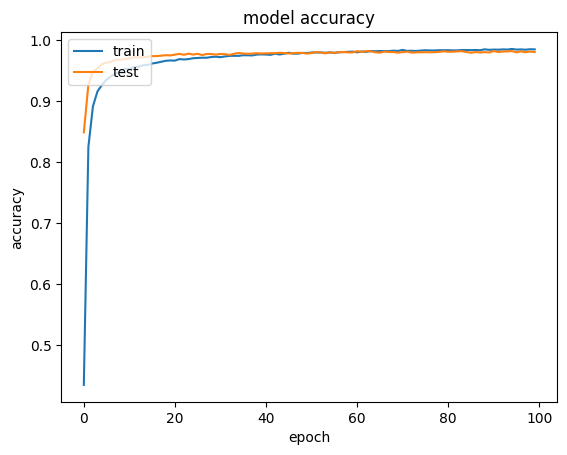

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

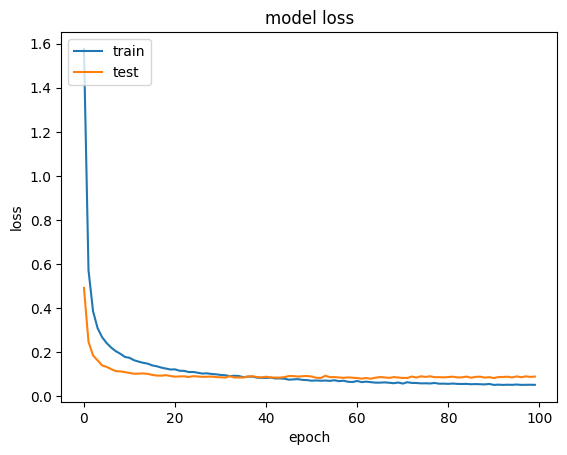

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()